In [1]:
%load_ext autoreload
%autoreload 2

# Delfi with iPyParallel

First we load our iPyParallel engines and create a load balanced view of each engine

In [2]:
import ipyparallel as ipp
rc = ipp.Client()
view = rc[:]

We load the modules locally

In [3]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import distributions.priors as priors
import ndes.ndes as ndes
import delfi.delfi as delfi
import distributions.priors as priors
import compression.score.score as score
import tqdm

and you want to `cd` your engines to your current directory

In [4]:
%%px 
%cd "/hdd/delfi"

[stdout:0] /hdd/delfi
[stdout:1] /hdd/delfi
[stdout:2] /hdd/delfi
[stdout:3] /hdd/delfi
[stdout:4] /hdd/delfi
[stdout:5] /hdd/delfi
[stdout:6] /hdd/delfi
[stdout:7] /hdd/delfi
[stdout:8] /hdd/delfi
[stdout:9] /hdd/delfi
[stdout:10] /hdd/delfi
[stdout:11] /hdd/delfi
[stdout:12] /hdd/delfi
[stdout:13] /hdd/delfi
[stdout:14] /hdd/delfi
[stdout:15] /hdd/delfi
[stdout:16] /hdd/delfi
[stdout:17] /hdd/delfi
[stdout:18] /hdd/delfi
[stdout:19] /hdd/delfi
[stdout:20] /hdd/delfi
[stdout:21] /hdd/delfi
[stdout:22] /hdd/delfi
[stdout:23] /hdd/delfi
[stdout:24] /hdd/delfi
[stdout:25] /hdd/delfi
[stdout:26] /hdd/delfi
[stdout:27] /hdd/delfi
[stdout:28] /hdd/delfi
[stdout:29] /hdd/delfi
[stdout:30] /hdd/delfi
[stdout:31] /hdd/delfi
[stdout:32] /hdd/delfi
[stdout:33] /hdd/delfi
[stdout:34] /hdd/delfi
[stdout:35] /hdd/delfi
[stdout:36] /hdd/delfi
[stdout:37] /hdd/delfi
[stdout:38] /hdd/delfi
[stdout:39] /hdd/delfi


And finally load the modules which are needed locally and on the engines

In [5]:
%%px --local
%env OMP_NUM_THREADS=1
%env omp_num_threads=1
%env MKL_NUM_THREADS=1
%env mkl_num_threads=1
import numpy as np
import pickle
import healpy as hp
from simulators.cosmic_shear_map.cosmic_shear import simulate
np.seterr(invalid='raise')

env: OMP_NUM_THREADS=1
env: omp_num_threads=1
env: MKL_NUM_THREADS=1
env: mkl_num_threads=1


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

[stdout:0] 
env: OMP_NUM_THREADS=1
env: omp_num_threads=1
env: MKL_NUM_THREADS=1
env: mkl_num_threads=1
[stdout:1] 
env: OMP_NUM_THREADS=1
env: omp_num_threads=1
env: MKL_NUM_THREADS=1
env: mkl_num_threads=1
[stdout:2] 
env: OMP_NUM_THREADS=1
env: omp_num_threads=1
env: MKL_NUM_THREADS=1
env: mkl_num_threads=1
[stdout:3] 
env: OMP_NUM_THREADS=1
env: omp_num_threads=1
env: MKL_NUM_THREADS=1
env: mkl_num_threads=1
[stdout:4] 
env: OMP_NUM_THREADS=1
env: omp_num_threads=1
env: MKL_NUM_THREADS=1
env: mkl_num_threads=1
[stdout:5] 
env: OMP_NUM_THREADS=1
env: omp_num_threads=1
env: MKL_NUM_THREADS=1
env: mkl_num_threads=1
[stdout:6] 
env: OMP_NUM_THREADS=1
env: omp_num_threads=1
env: MKL_NUM_THREADS=1
env: mkl_num_threads=1
[stdout:7] 
env: OMP_NUM_THREADS=1
env: omp_num_threads=1
env: MKL_NUM_THREADS=1
env: mkl_num_threads=1
[stdout:8] 
env: OMP_NUM_THREADS=1
env: omp_num_threads=1
env: MKL_NUM_THREADS=1
env: mkl_num_threads=1
[stdout:9] 
env: OMP_NUM_THREADS=1
env: omp_num_threads=1
env: M

Out[0:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[1:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[2:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[3:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[4:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[5:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[6:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[7:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[8:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[9:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[10:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[11:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[12:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[13:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[14:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[15:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[16:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[17:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[18:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[19:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[20:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[21:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[22:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[23:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[24:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[25:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[26:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[27:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[28:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[29:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[30:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[31:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[32:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[33:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[34:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[35:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[36:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[37:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[38:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

Out[39:10]: {'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'raise'}

## Define a cosmic shear emulator

First we will set the fiducial parameter values both locally and on the engines.

In [6]:
%%px --local
theta_fiducial = np.array([0.3, 0.8, 0.05, 0.70, 0.96])
npar = theta_fiducial.shape[0]

Then we will set a prior for the parameters (truncated Gaussian).

In [7]:
# Prior boundaries
lower = np.array([0, 0.4, 0, 0.4, 0.7])
upper = np.array([1, 1.2, 0.1, 1.0, 1.3])

# Prior mean and covariance
prior_mean = np.array([0.3, 0.8, 0.05, 0.70, 0.96])
prior_covariance = np.eye(5)*np.array([0.1, 0.1, 0.05, 0.3, 0.3])**2

# Create prior over parameters
prior = priors.TruncatedGaussian(prior_mean, prior_covariance, lower, upper)

We next need some labels and ranges for plotting

In [8]:
names = ['\Omega_m', 'S_8', '\Omega_b', 'h', 'n_s']
labels =  ['\\Omega_m', 'S_8', '\\Omega_b', 'h', 'n_s']
ranges = {'\Omega_m':[lower[0], upper[0]], 'S_8':[lower[1],upper[1]],'\Omega_b':[lower[2],upper[2]],
            'h':[lower[3],upper[3]],'n_s':[lower[4],upper[4]]}

On every engine (and locally) we will define a simulator.

In [9]:
%%px --local

# Redshift distributions
pz_fid = pickle.load(open('simulators/cosmic_shear_map/pz_5bin.pkl', 'rb'))
nz = len(pz_fid)

nside = 512
lmax = 3*nside-1
lmin = 10
n_ell_bins = 7
npix = hp.nside2npix(nside)

# Mask (Euclid)
mask = hp.ud_grade(hp.read_map('simulators/cosmic_shear_map/Euclid_footprint_and_StarMask512.fits'), nside)
#mask = hp.read_map('simulators/cosmic_shear_map/Euclid_footprint_and_StarMask512.fits')
mask = np.array([mask for x in range(nz)])
# Pixel-space shape noise standard deviation at each redshift
sigma_e = 0.3
n_p_mean = 1.6e9 / np.sum(mask)
sig_n_p = sigma_e**2/np.random.poisson(n_p_mean, size=(nz, npix))

# Simulation and simulation arguments
def simulator(theta, seed, simulator_args, batch):
    return simulate(theta, seed, simulator_args, batch)
simulator_args = [pz_fid, lmin, lmax, sig_n_p, mask, n_ell_bins]

NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
[stdout:0] 
NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
[stdout:1] 
NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
[stdout:2] 
NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
[stdout:3] 
NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
[stdout:4] 
NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
[stdout:5] 
NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
[stdout:6] 
NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
[stdout:7] 
NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
[stdout:8] 
NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
[stdout:9] 
NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
[stdout:10] 
NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
[stdout:11] 
NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
[stdout:12] 
NSIDE = 512
ORDERING = RING in fits file
INDXSCH

For conveniance we will define a seed generator on every engine and locally

In [10]:
%%px --local
seed_generator = lambda: np.random.randint(2147483647)

### Simulate real data
We simulate the real data locally. We time it for benchmarking.

In [11]:
start = time.time()
data = simulator(theta_fiducial, 0, simulator_args, 1)[0]
print(time.time()-start)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
21.972726106643677


## Calculate score compression

### Define external functions on engines
We can parallelise the simulations (and calculation of the derivative of the mean) by running the functions independently on the engines. To do this we define the functions (which have almost the same form as in compression/score/score.py - perhaps they could be redefined this way). We have one function for the derivative of the means and one for the means and covariances at the fiducial parameter. We define the functions themselves on the engines.

In [12]:
%%px --local
def sub_batch_sims(theta):
    seed = seed_generator()
    #sims = simulator(theta, seed, simulator_args, sub_batch)
    try:
        sims = simulator(theta, seed, simulator_args, sub_batch)
    except: 
        return None
    if sub_batch == 1:
        return np.squeeze(sims, axis = 0), theta
    else:
        return sims, np.array([theta for k in range(sub_batch)])

In [13]:
%%px --local
def derivative_sub_batch_sims(sim_id):
    sims_dash = np.zeros((sub_batch, ndata))
    theta = np.zeros((sub_batch, npar))
    dmudt = np.zeros((npar, ndata))
    seed = seed_generator()
    d_fiducial = np.mean(np.atleast_2d(simulator(theta_fiducial, seed, simulator_args, sub_batch)), axis=0)
    for i in range(npar):
        theta[:, :] = np.copy(theta_fiducial)
        theta[:, i] += h[i]
        sims_dash[:, :] = np.atleast_2d(simulator(theta[0], seed, simulator_args, sub_batch))
        d_dash = np.mean(sims_dash, axis = 0)
        dmudt[i, :] = (d_dash - d_fiducial) / h[i]
    return sims_dash, theta, dmudt

We initialise the compression module locally

In [14]:
Compressor = score.Gaussian(len(data), theta_fiducial, prior_mean = prior_mean, prior_covariance = prior_covariance)

### Derivative of the mean
First we will calculate the derivative of the mean. We need to push the derivative sub-batch calculator and the necessary variables for the function to the engines first.

The simulations are done asynchronously so that they can be sent off to the engines and the Jupyter kernel can still be used. To check if the calculations have finished one can run
```python
derivative_data.ready()
```

We want to start by initialising some values on the engines so that we don't have to pass them each time. One of these (the size of the data) we're going to do by hand because I've not found a nice way to do this without running the simulator on each of the engines.

In [15]:
print(Compressor.ndata)

105


In [16]:
%%px --local
ndata = 105
h = abs(theta_fiducial)*0.05
sub_batch = 1

We then run the simulator on the engines

In [17]:
n_sims_for_derivatives = 100

derivative_data = view.map_async(lambda sim_id: derivative_sub_batch_sims(sim_id), range(n_sims_for_derivatives))

Once the parallel simulations have finished then they can be retreived using 
```python
derivative_data.get()
```
We get collect the simulations and parameters and place them in the local Compressor module variables. We also calculate the derivative of the mean over the simulations.

In [18]:
start = time.time()
Compressor.simulations = np.array([derivative_data.get()[i][0] for i in range(n_sims_for_derivatives)]).reshape((n_sims_for_derivatives * sub_batch, data.shape[0]))
Compressor.parameters = np.array([derivative_data.get()[i][1] for i in range(n_sims_for_derivatives)]).reshape((n_sims_for_derivatives * sub_batch, theta_fiducial.shape[0]))
Compressor.dmudt = np.mean([derivative_data.get()[i][2] for i in range(n_sims_for_derivatives)], axis = 0)
print(time.time()-start)

2072.007889509201


### Covariance at the fiducial parameter values
We now calculate the covariance and the mean at the fiducial parameter values after pushing the extra necessary parameters (and functions) that the engines need.

In [19]:
n_sims_for_covariance = 1000
theta_range = [theta_fiducial for i in range(n_sims_for_covariance)]
mean_cov_data = view.map_async(lambda theta: sub_batch_sims(theta), theta_range)

Again, we can see whether the jobs have finished by running
```python
mean_cov_data.ready()
```
We now calculate the mean, covariance and inverse covariance from these simulations and add the simulations to the local Compressor module variables.

In [20]:
start = time.time()
mean_cov_sims = np.array([mean_cov_data.get()[i][0] for i in range(n_sims_for_covariance)]).reshape((n_sims_for_covariance * sub_batch, data.shape[0]))
mean_cov_params = np.array([mean_cov_data.get()[i][1] for i in range(n_sims_for_covariance)]).reshape((n_sims_for_covariance * sub_batch, theta_fiducial.shape[0]))
print(time.time()-start)
Compressor.mu = np.mean(mean_cov_sims, axis = 0)
Compressor.C = np.cov(mean_cov_sims, rowvar = False)
Compressor.Cinv = np.linalg.inv(Compressor.C)
Compressor.simulations = np.concatenate([Compressor.simulations, mean_cov_sims])
Compressor.parameters = np.concatenate([Compressor.parameters, mean_cov_params])

3544.558133125305


### Compute the Fisher matrix
We can calculate the Fisher information directly from the local Compressor module

In [21]:
Compressor.compute_fisher()

### Define the compression function and compress the data

In [22]:
# Compressor function: This must have the form compressor(data, args) -> compressed summaries (pseudoMLE)
def compressor(d, compressor_args):
    return Compressor.scoreMLE(d)
compressor_args = None

# Compress the data
compressed_data = compressor(data, compressor_args)

## Make the density estimator
We only need a local density estimator, which can be run on a GPU for efficienc

In [23]:
# Create the neural density estimator (MDN)
MDN = ndes.MixtureDensityNetwork(n_inputs=5, n_outputs=5, n_components=3, n_hidden=[25,25], activations=[tf.tanh, tf.tanh])

## Create the Delfi instance for training the density estimator

In [24]:
# Create the DELFI object
DelfiMDN = delfi.Delfi(compressed_data, prior, MDN, Compressor.Finv, theta_fiducial, 
                       param_limits = [lower, upper],
                       param_names = ['\Omega_m', 'S_8', '\Omega_b', 'h', 'n_s'], 
                       results_dir = "simulators/cosmic_shear_map/results/mdn_")

Since no simulations are needed for Fisher pretraining, we do not need to edit this function.

INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model
Sampling approximate posterior...
Done.
Removed no burn in


/home/tomcharnock/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


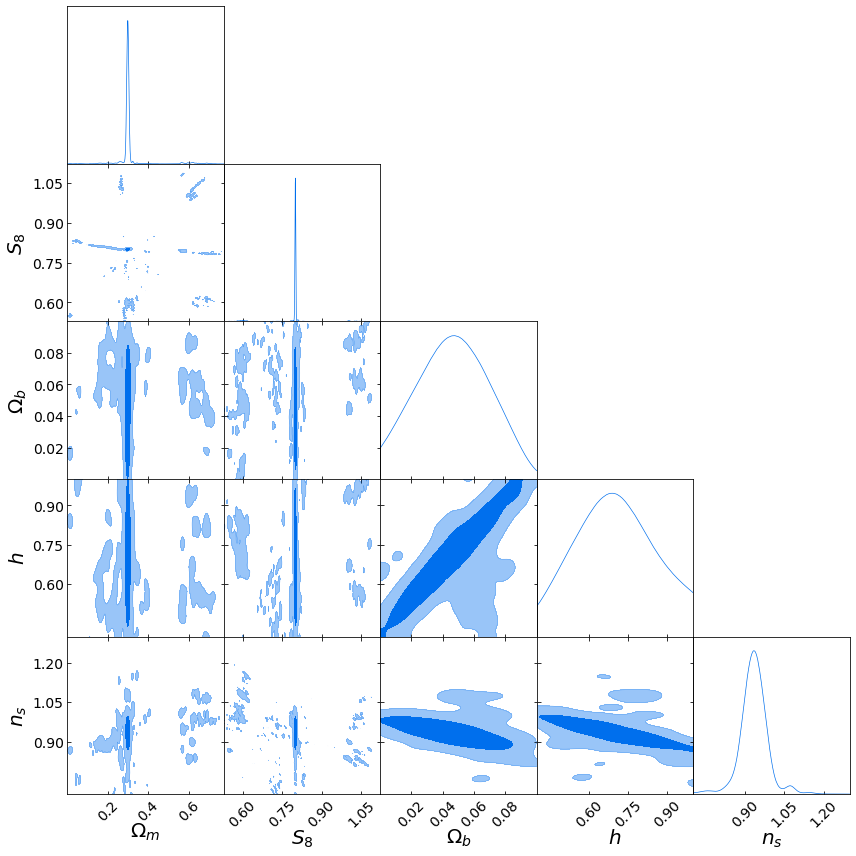

In [25]:
# Do the Fisher pre-training
DelfiMDN.fisher_pretraining(patience = 20, batch_size = 100, save_during_early_stopping = True)

## Load simulations into Delfi
Since we run a number of simulations for the compression function, these can be preloaded into Delfi.

In [26]:
# Load the simulations that have been ran for the compression function into Delfi

# Compress the simulations
compressed_sims = np.array([compressor(Compressor.simulations[i,:], compressor_args) for i in range(len(Compressor.simulations))])

# Load them in to the Delfi object
DelfiMDN.load_simulations(compressed_sims, Compressor.parameters)

## Train Delfi
We are going to expand the sequential training so that we can do parallel simulations

INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


Sampling approximate posterior...
Done.
Removed no burn in


/home/tomcharnock/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


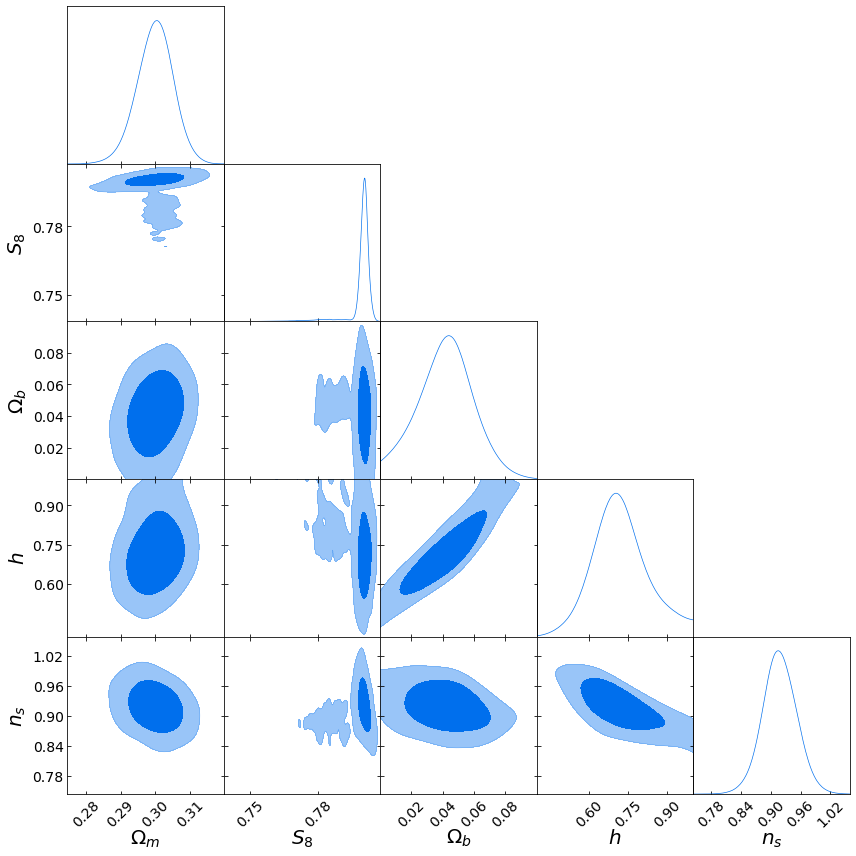

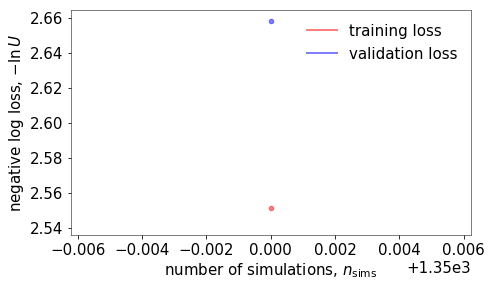

INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


Sampling approximate posterior...
Done.
Removed no burn in


/home/tomcharnock/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


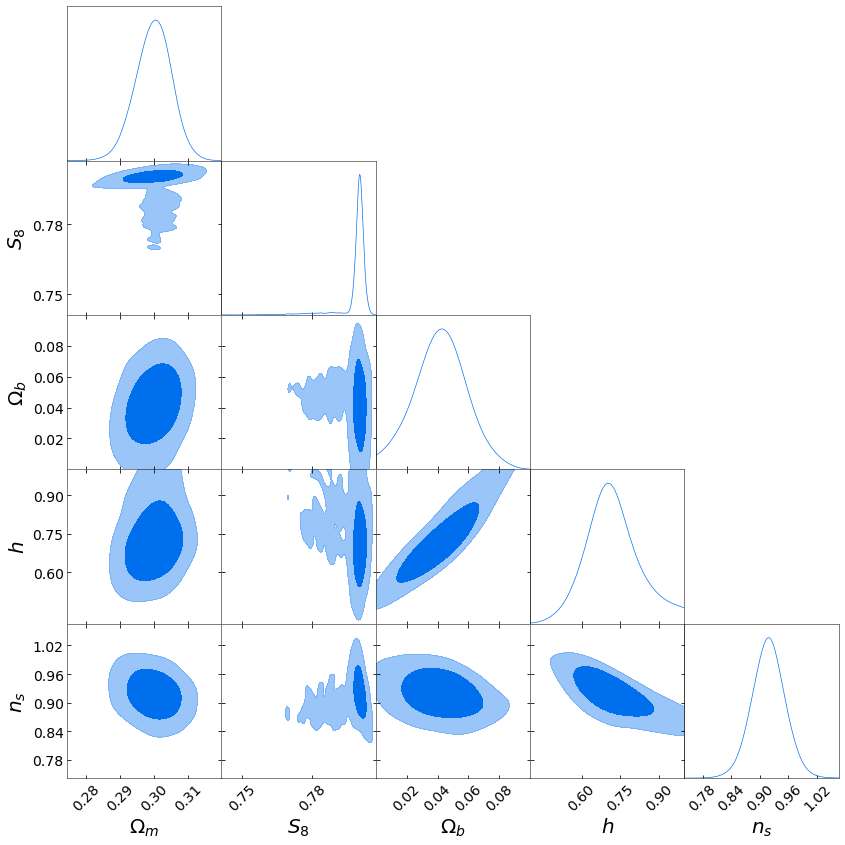

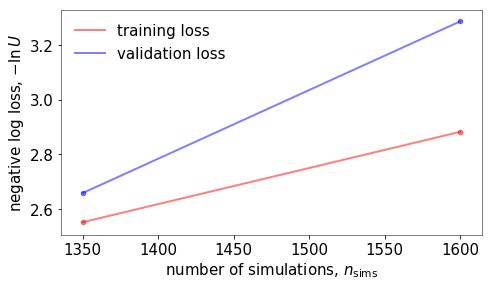

INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


Sampling approximate posterior...
Done.
Removed no burn in


/home/tomcharnock/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


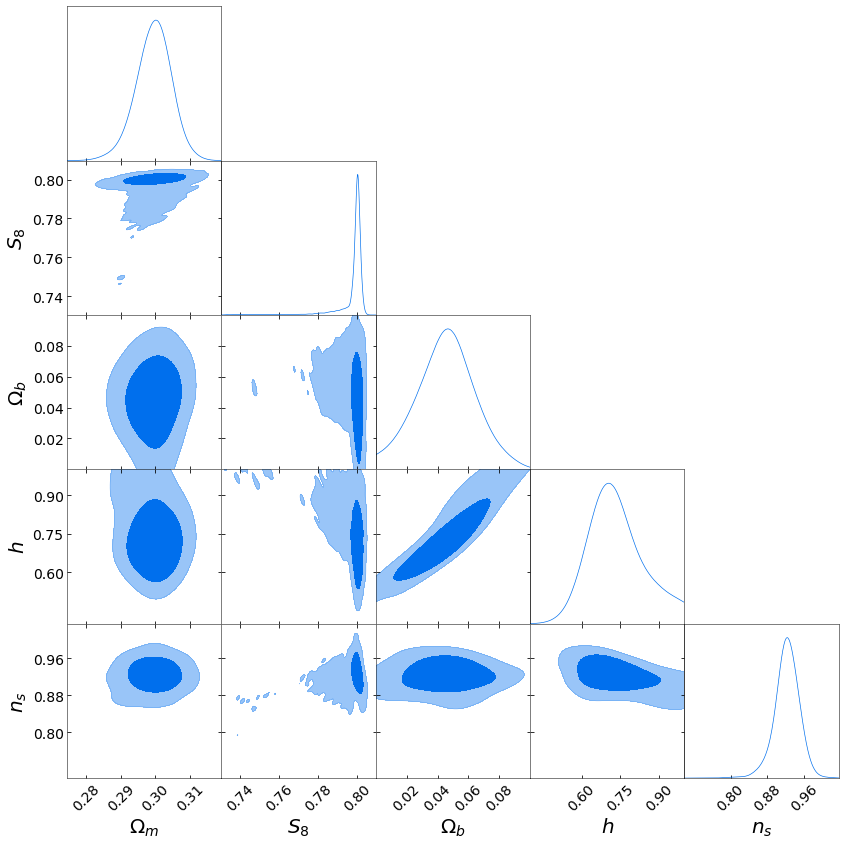

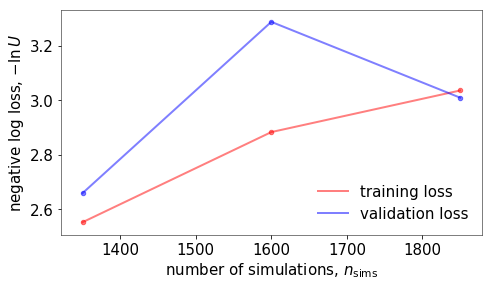

INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


Sampling approximate posterior...
Done.
Removed no burn in


/home/tomcharnock/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


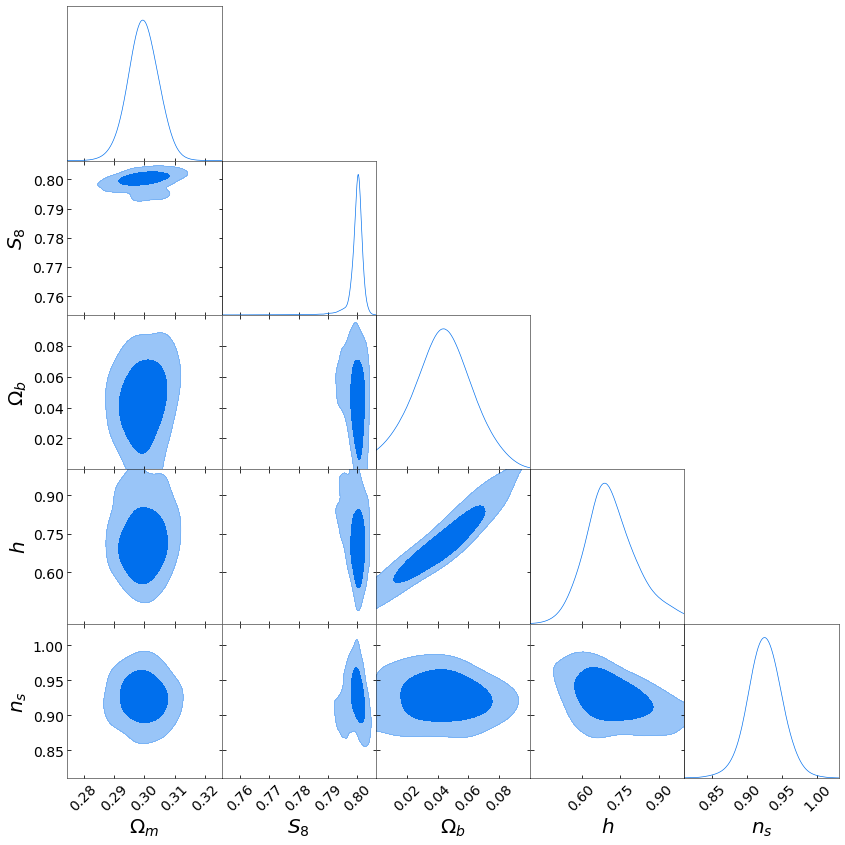

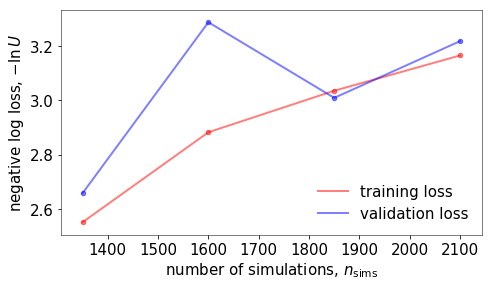

INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


Sampling approximate posterior...
Done.
Removed no burn in


/home/tomcharnock/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


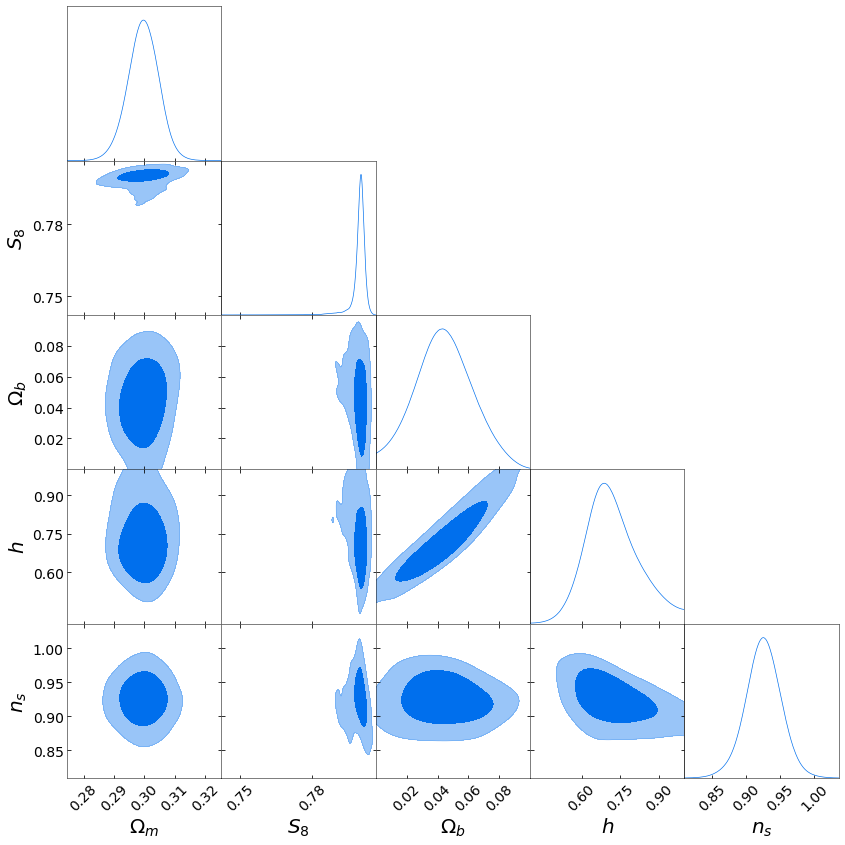

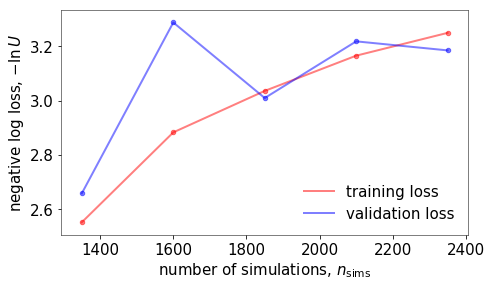

INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


Sampling approximate posterior...
Done.
Removed no burn in


/home/tomcharnock/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


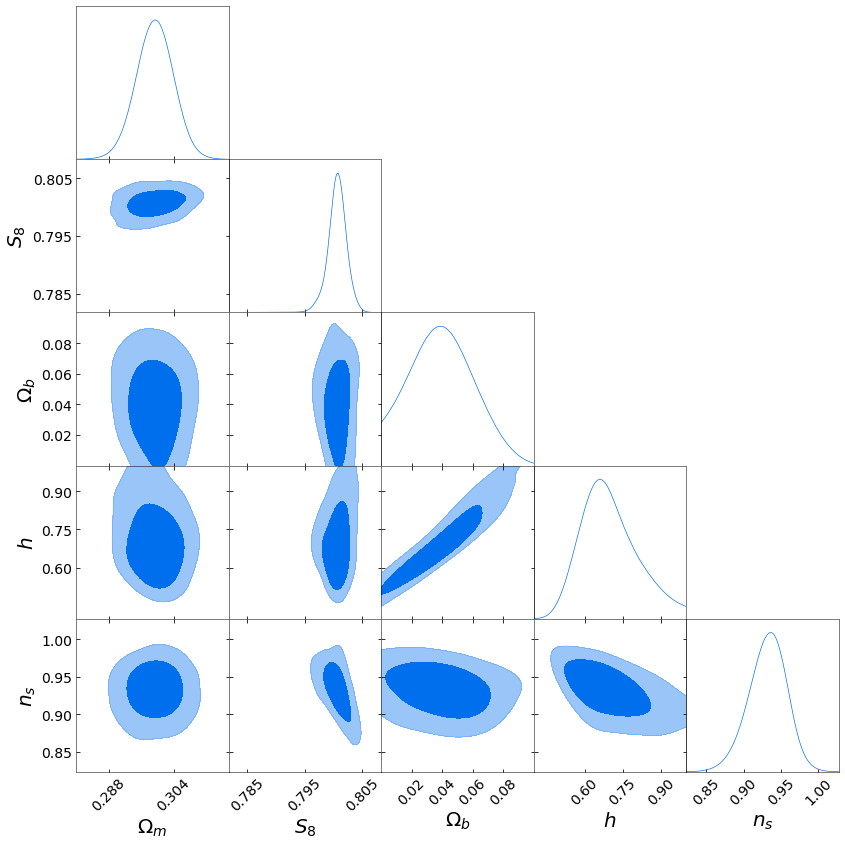

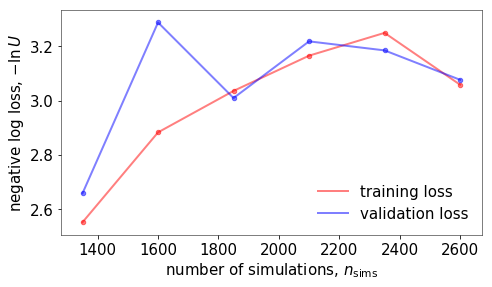

INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


Sampling approximate posterior...
Done.
Removed no burn in


/home/tomcharnock/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


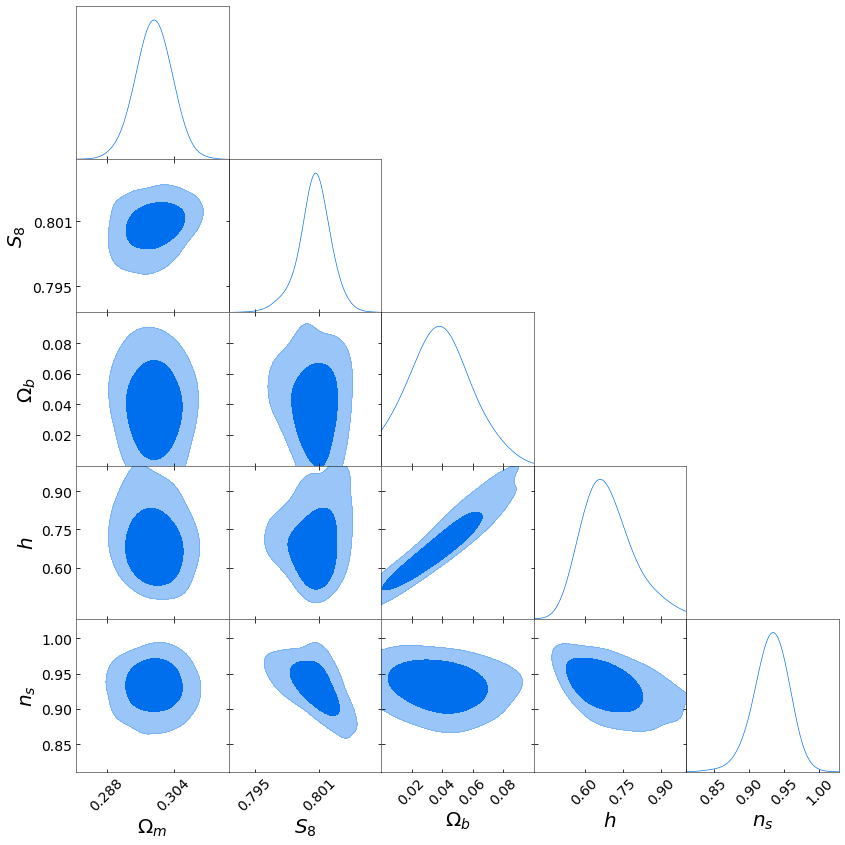

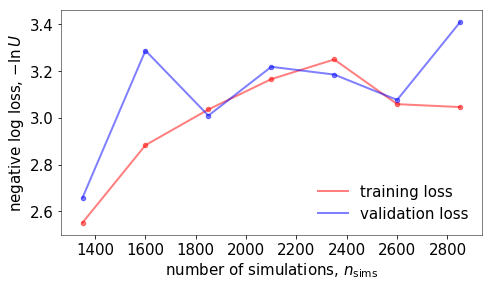

INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


Sampling approximate posterior...
Done.
Removed no burn in


/home/tomcharnock/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


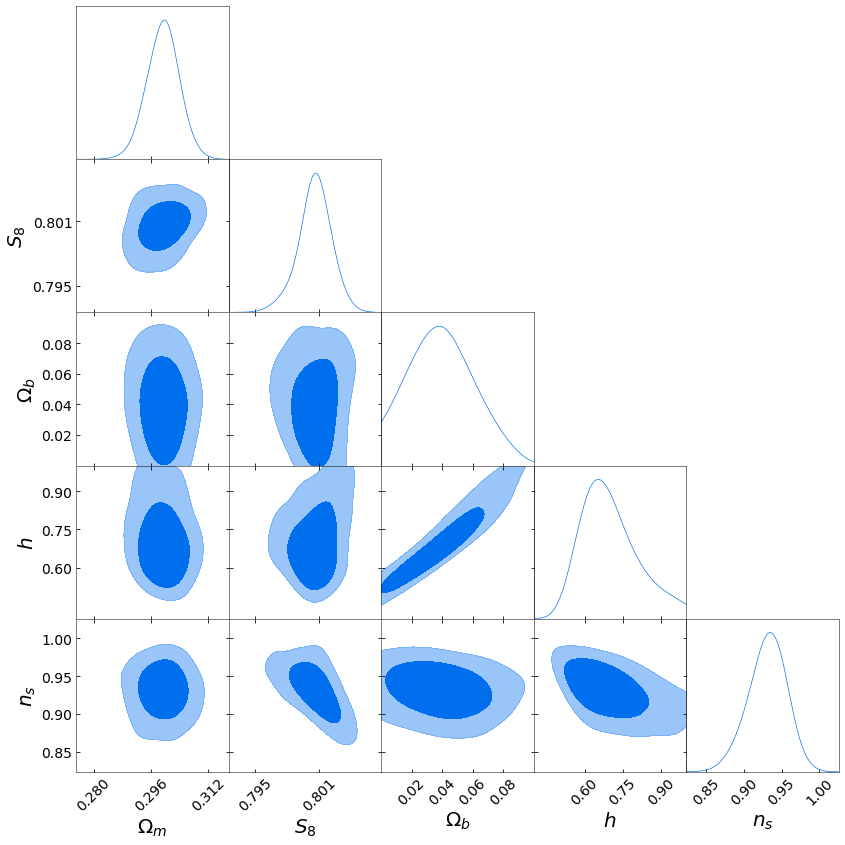

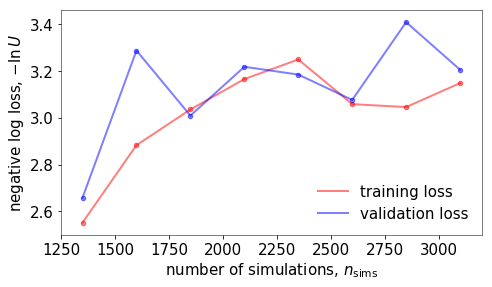

INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


Sampling approximate posterior...
Done.
Removed no burn in


/home/tomcharnock/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


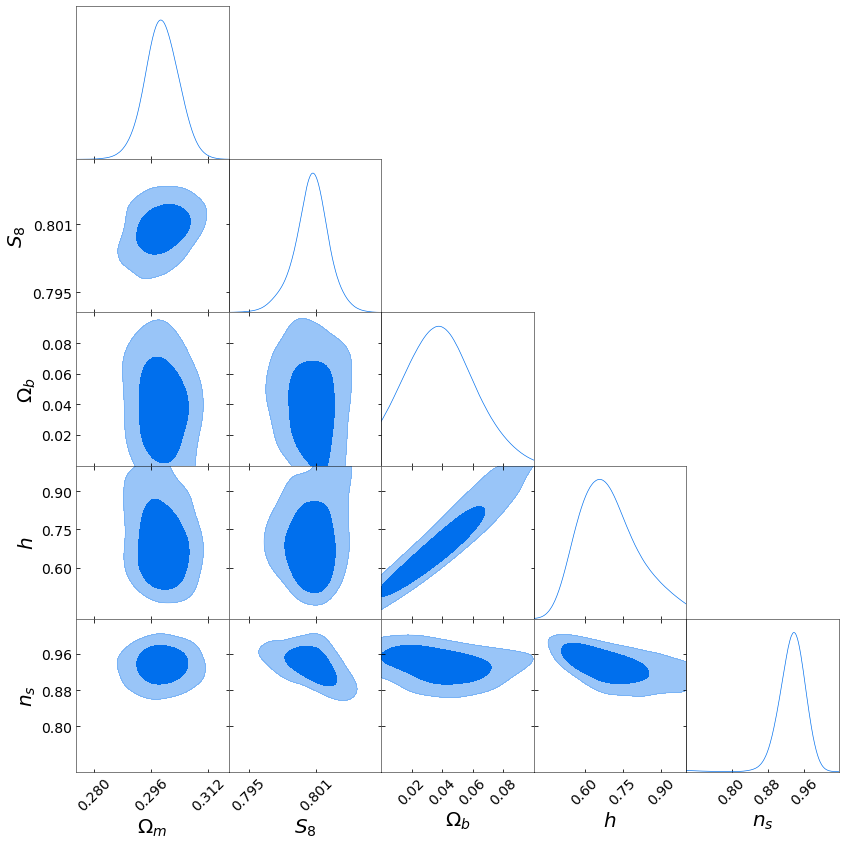

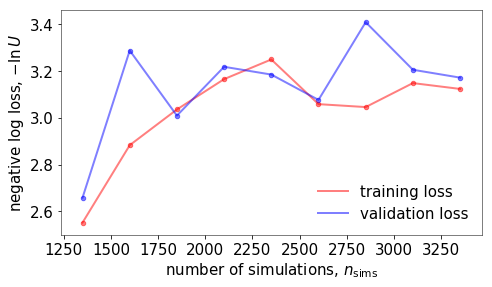

INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


Sampling approximate posterior...
Done.
Removed no burn in


/home/tomcharnock/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


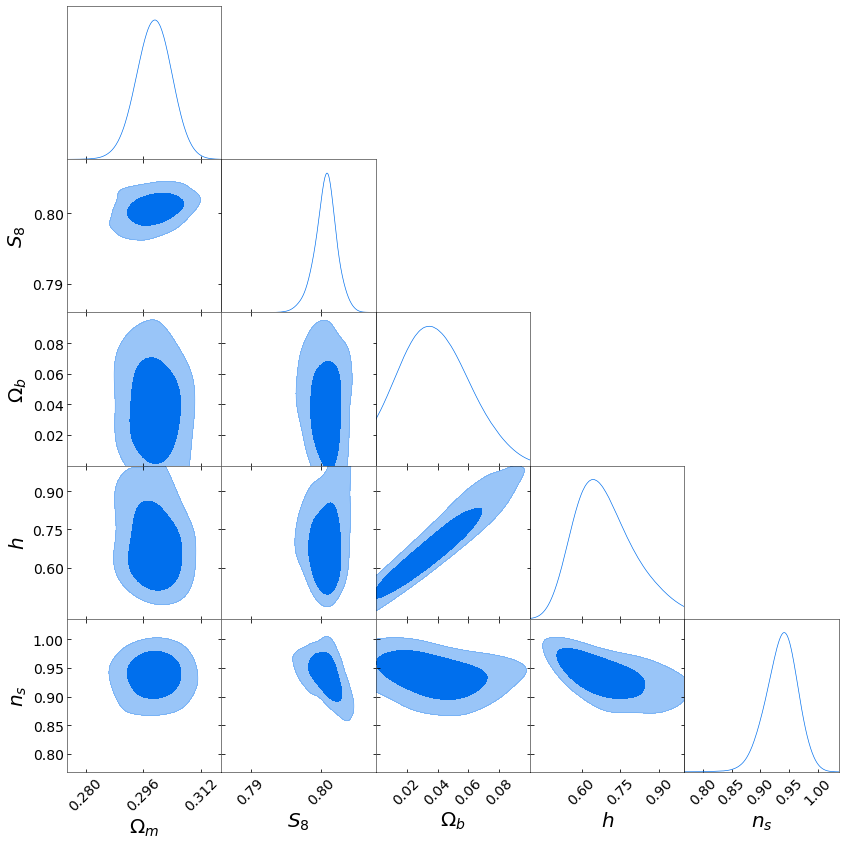

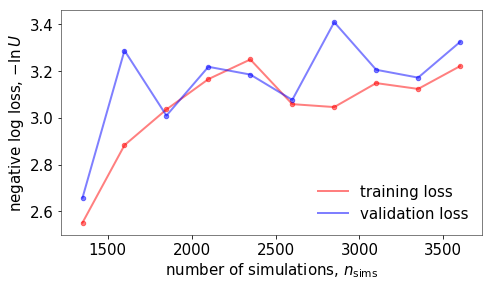

INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


Sampling approximate posterior...
Done.
Removed no burn in


/home/tomcharnock/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


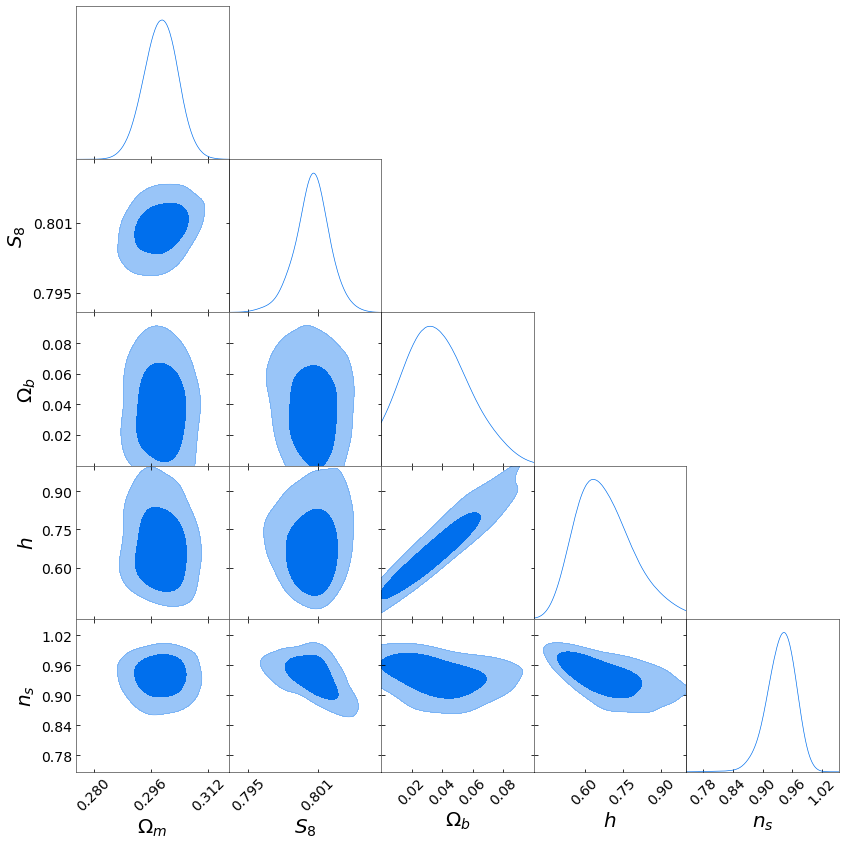

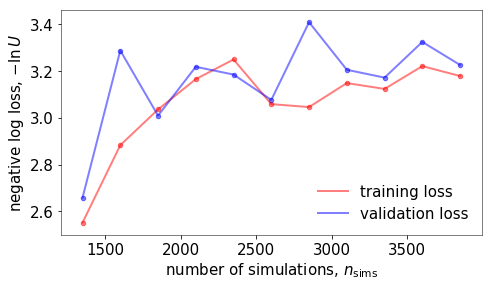

INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


Sampling approximate posterior...
Done.
Removed no burn in


/home/tomcharnock/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


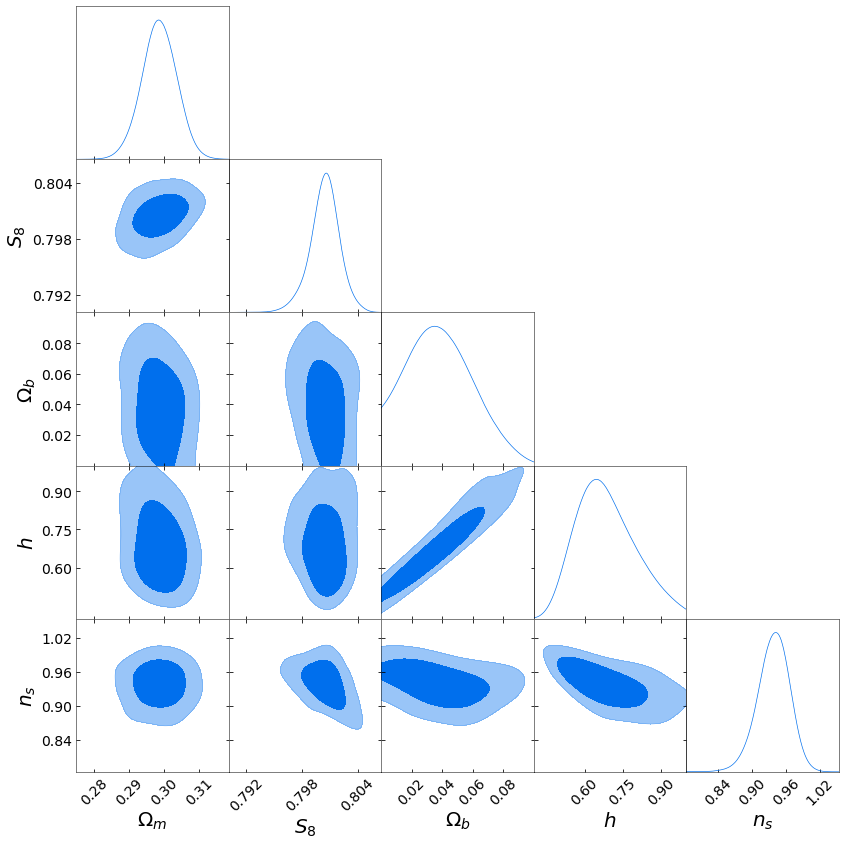

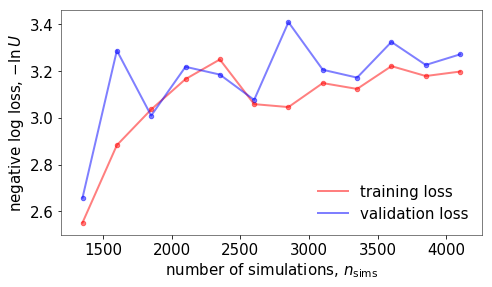

INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


Sampling approximate posterior...
Done.
Removed no burn in


/home/tomcharnock/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


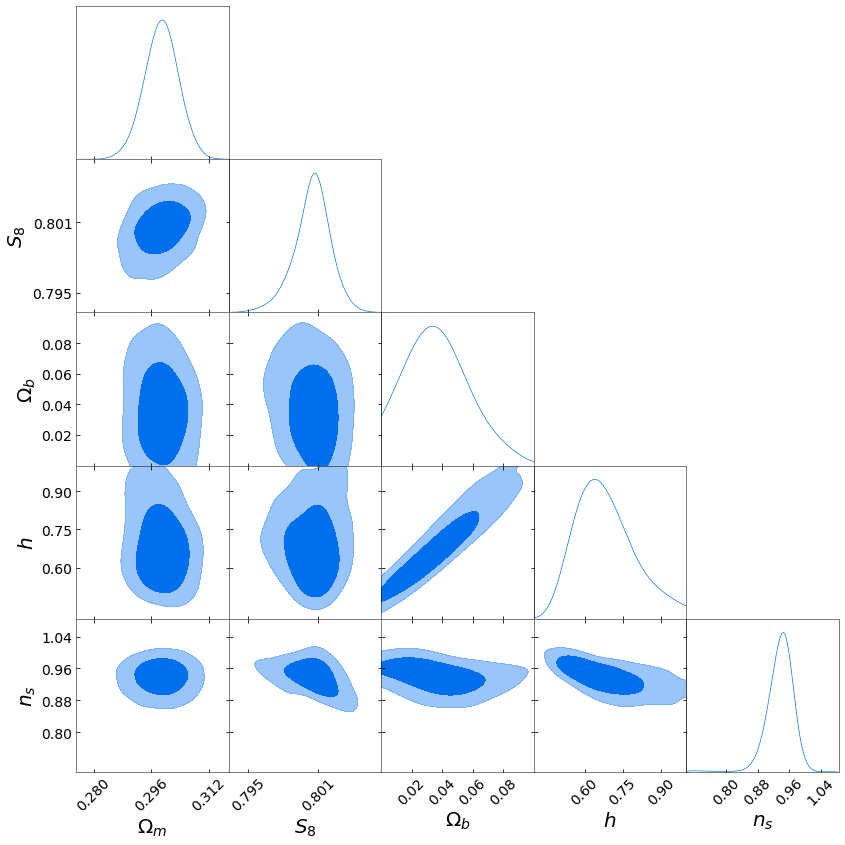

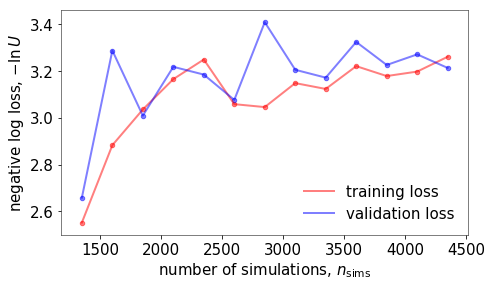

INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


Sampling approximate posterior...
Done.
Removed no burn in


/home/tomcharnock/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


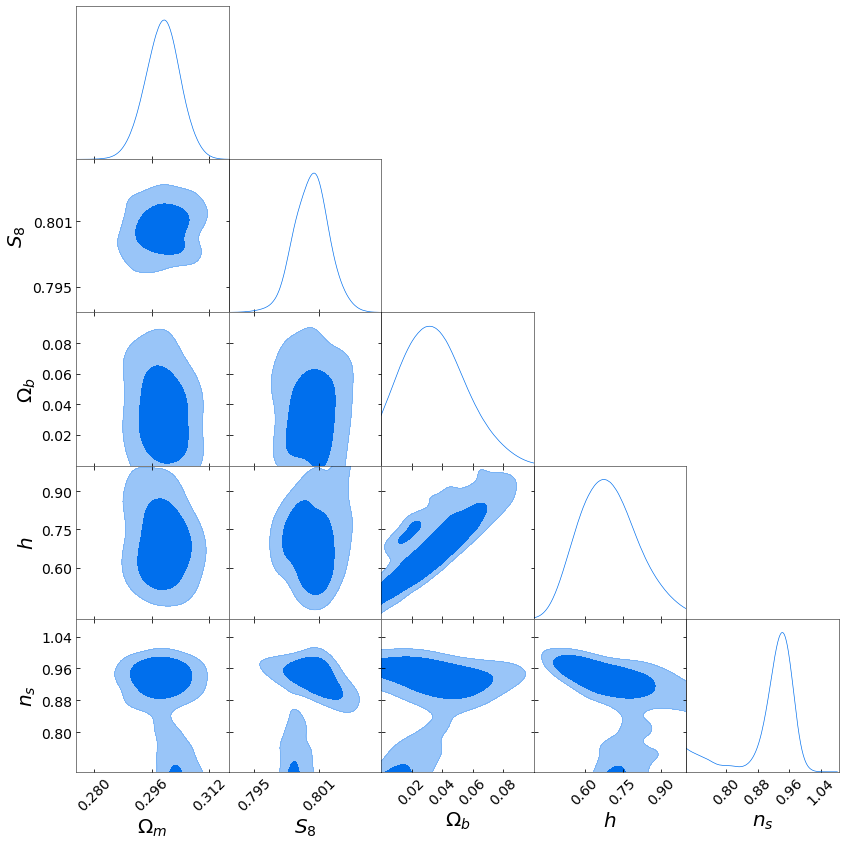

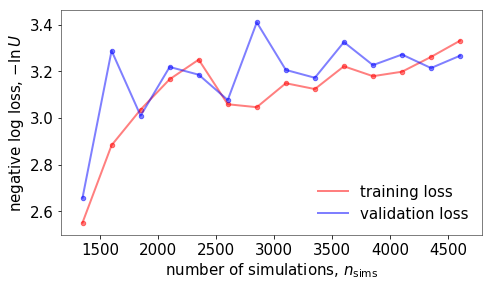

INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


Sampling approximate posterior...
Done.
Removed no burn in


/home/tomcharnock/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


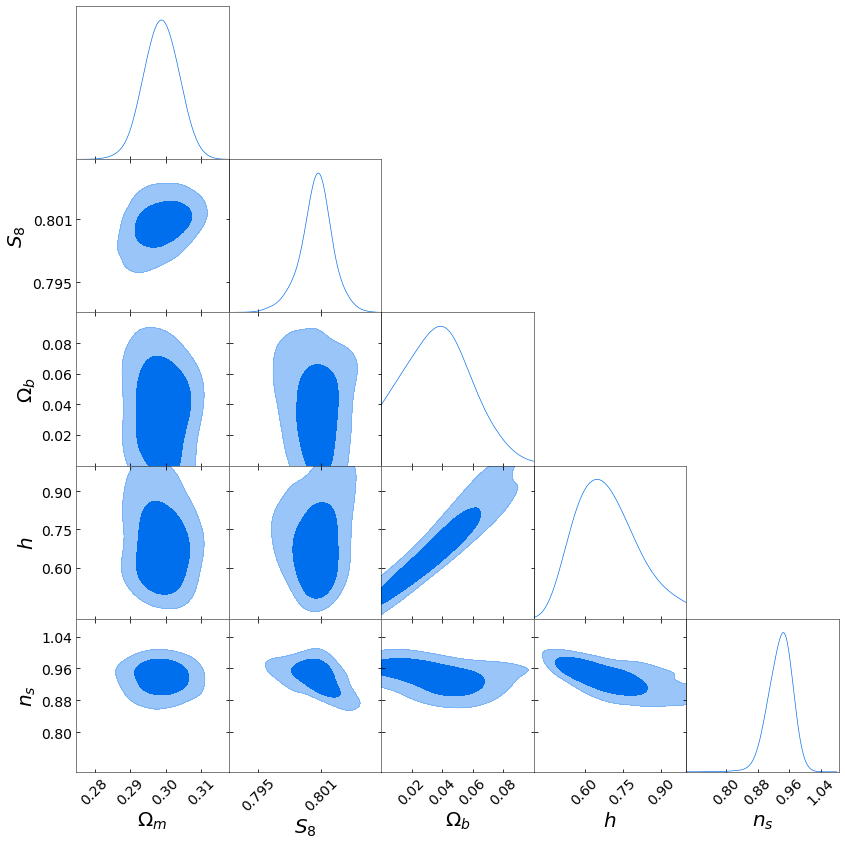

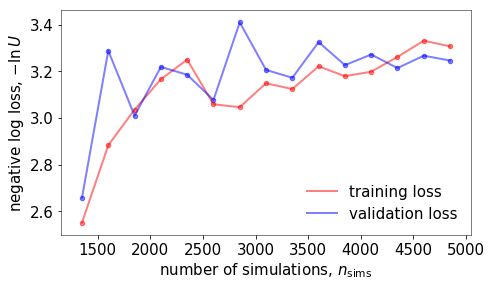

INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


Sampling approximate posterior...
Done.
Removed no burn in


/home/tomcharnock/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


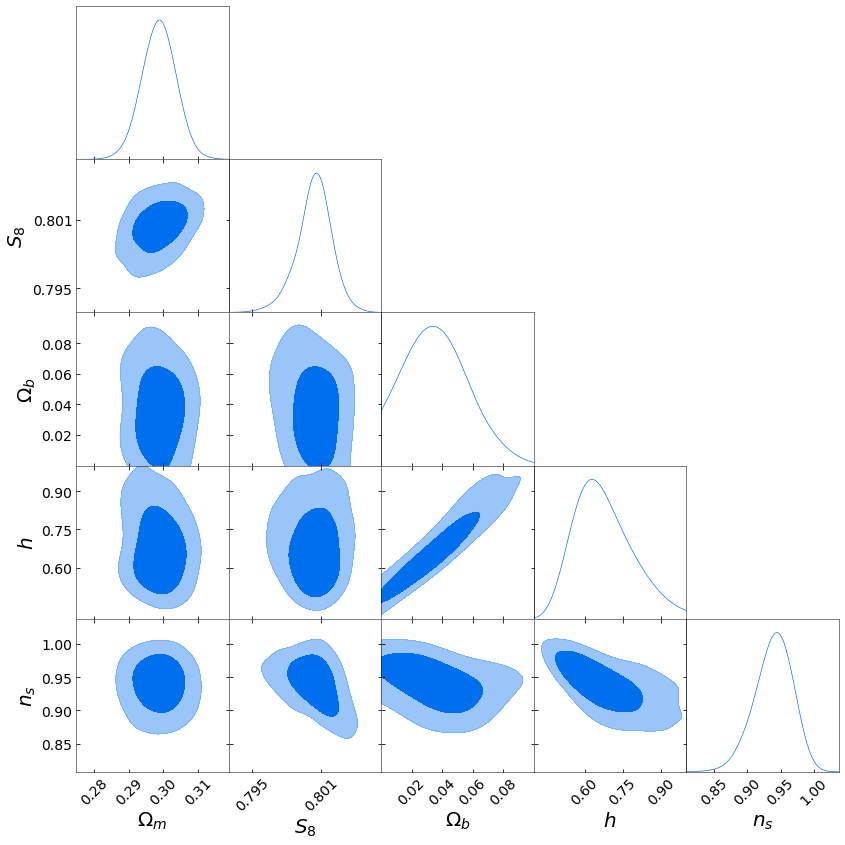

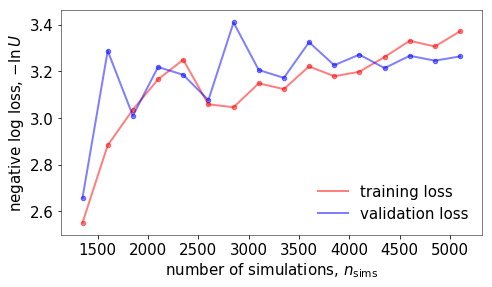

INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


Sampling approximate posterior...
Done.
Removed no burn in


/home/tomcharnock/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


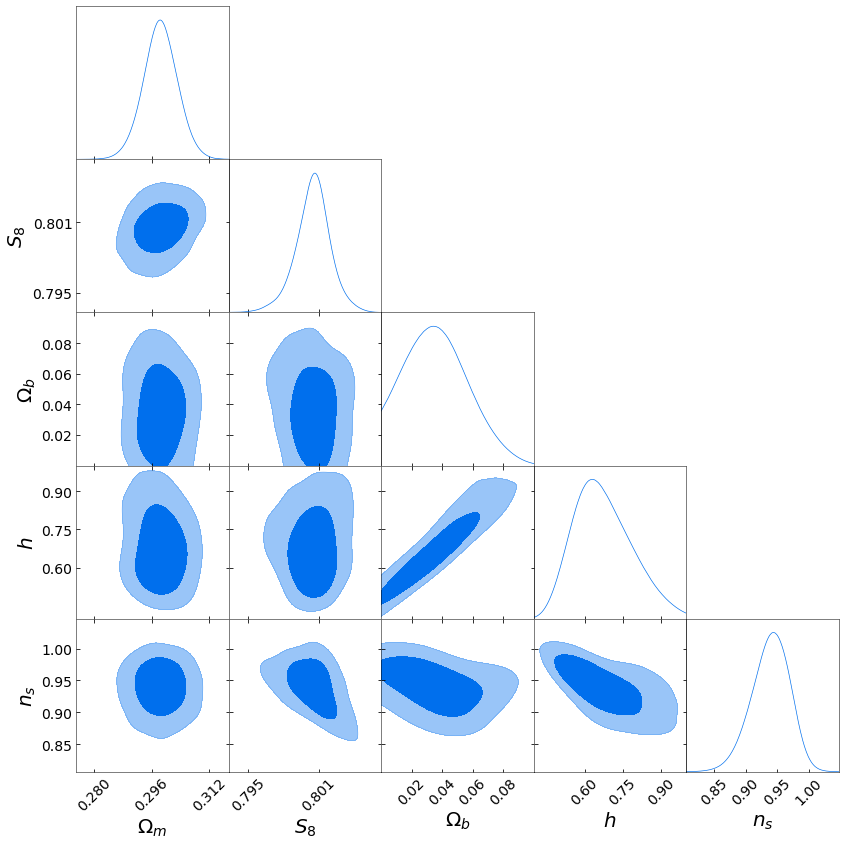

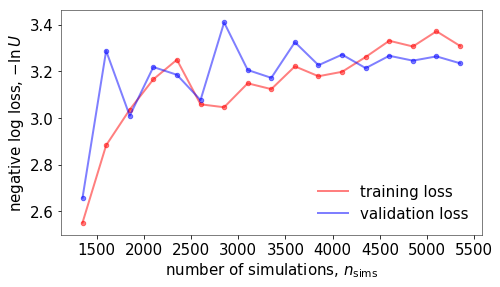

INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


Sampling approximate posterior...
Done.
Removed no burn in


/home/tomcharnock/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


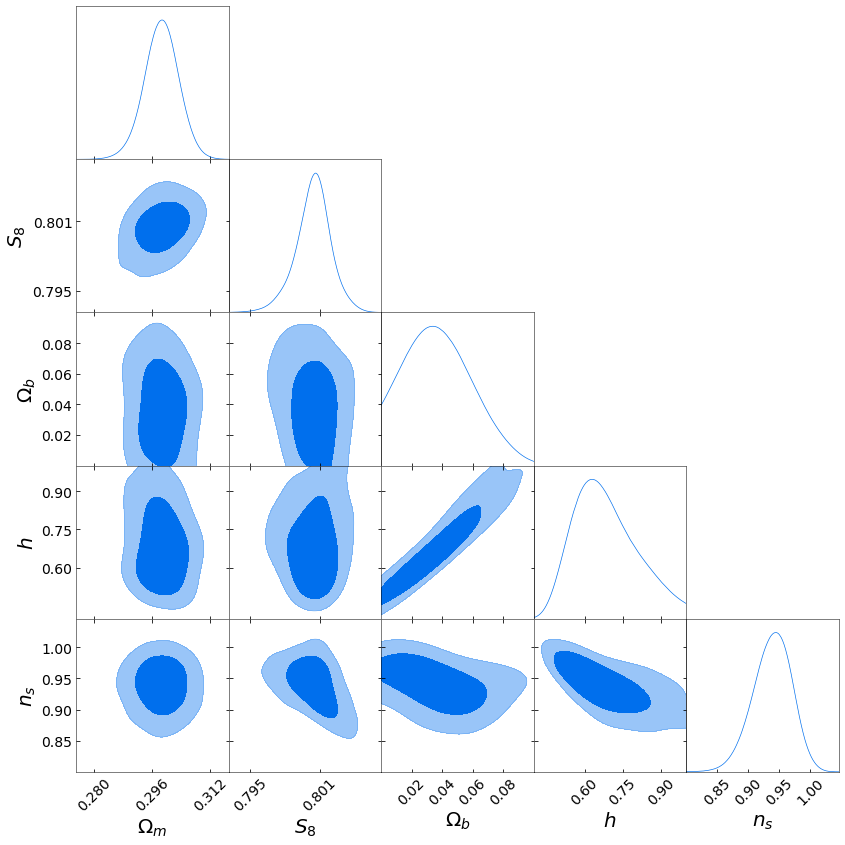

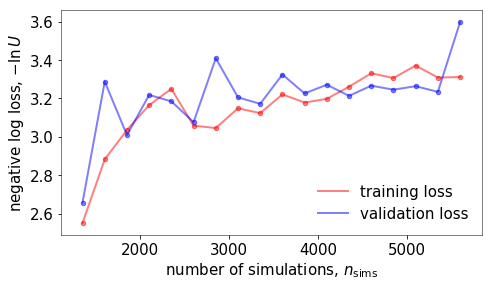

INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


Sampling approximate posterior...
Done.
Removed no burn in


/home/tomcharnock/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


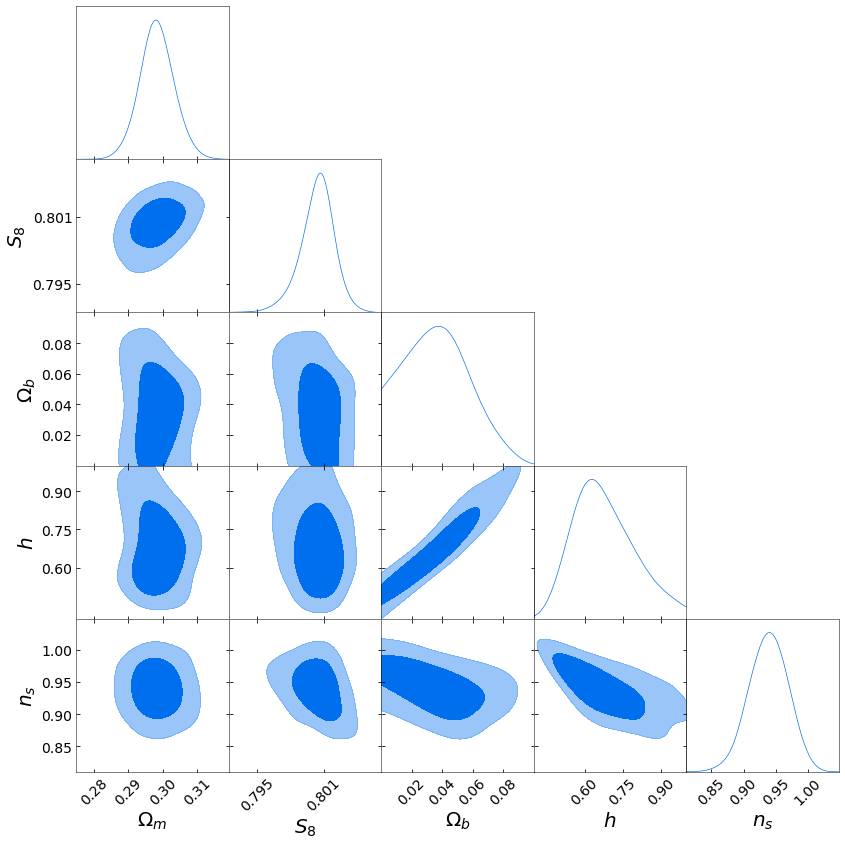

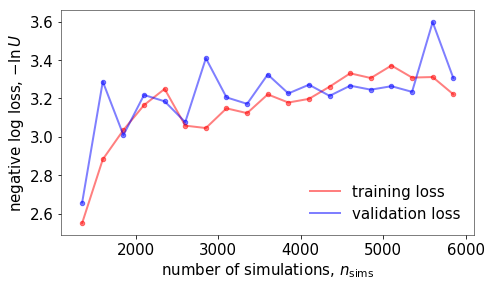

INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


Sampling approximate posterior...
Done.
Removed no burn in


/home/tomcharnock/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


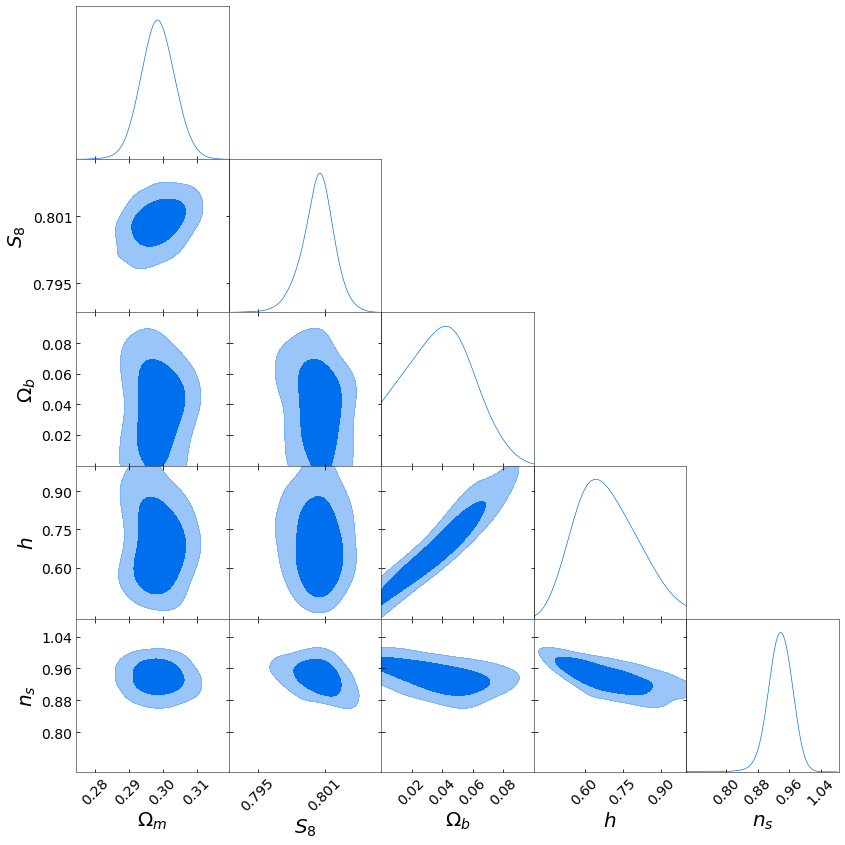

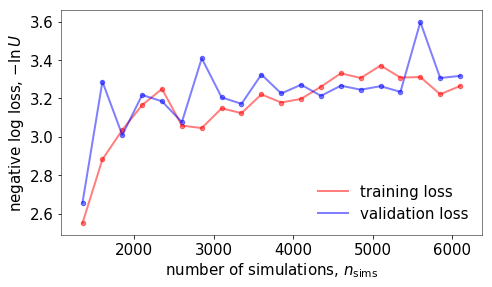

INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


Sampling approximate posterior...
Done.
Removed no burn in


/home/tomcharnock/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


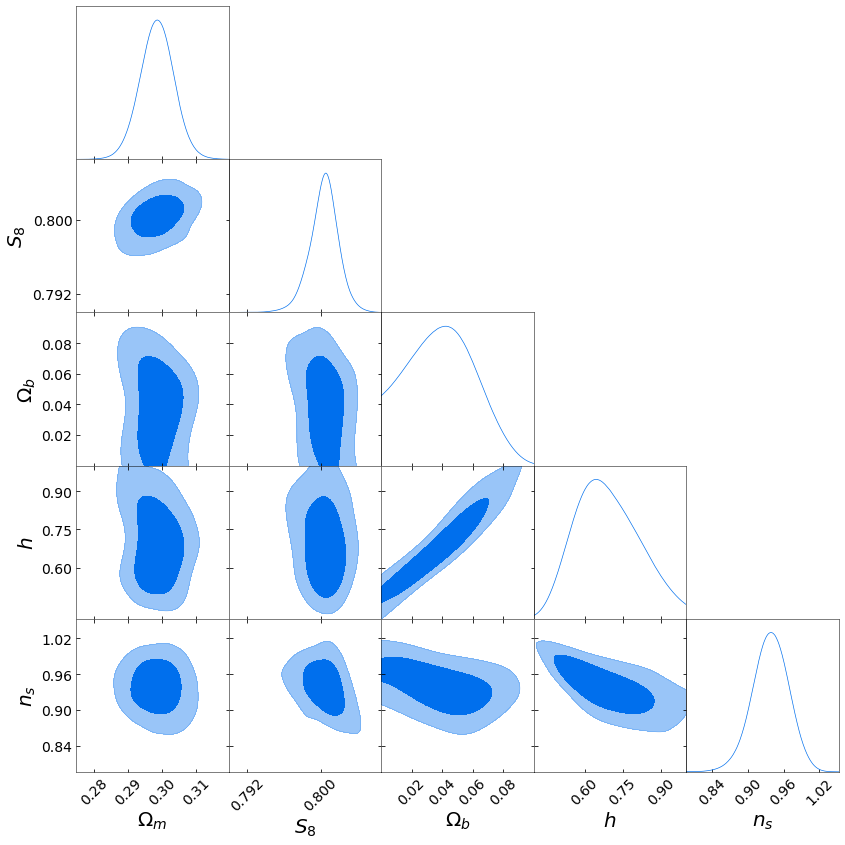

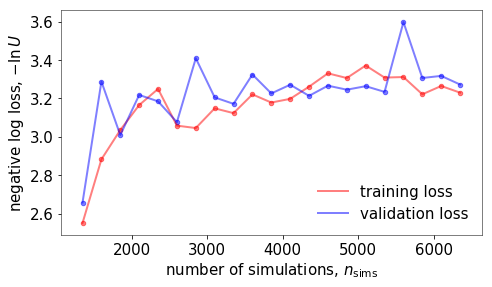

INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


Sampling approximate posterior...
Done.
Removed no burn in


/home/tomcharnock/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


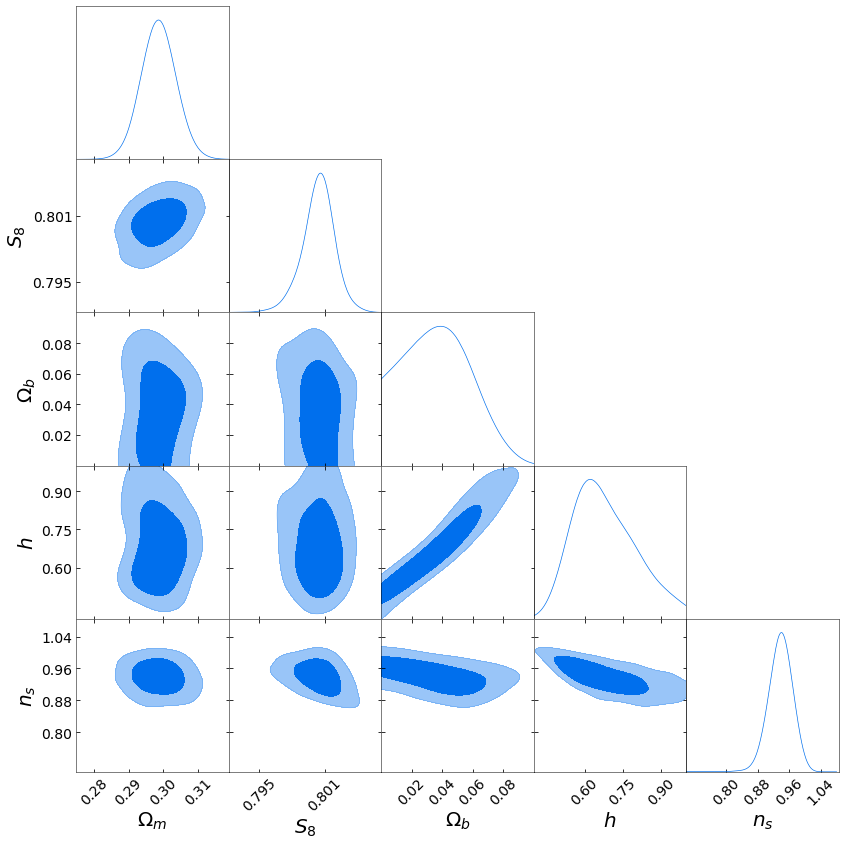

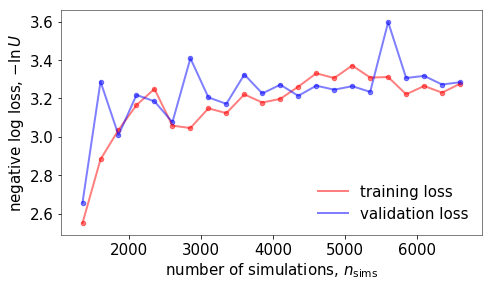

INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


Sampling approximate posterior...
Done.
Removed no burn in


/home/tomcharnock/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


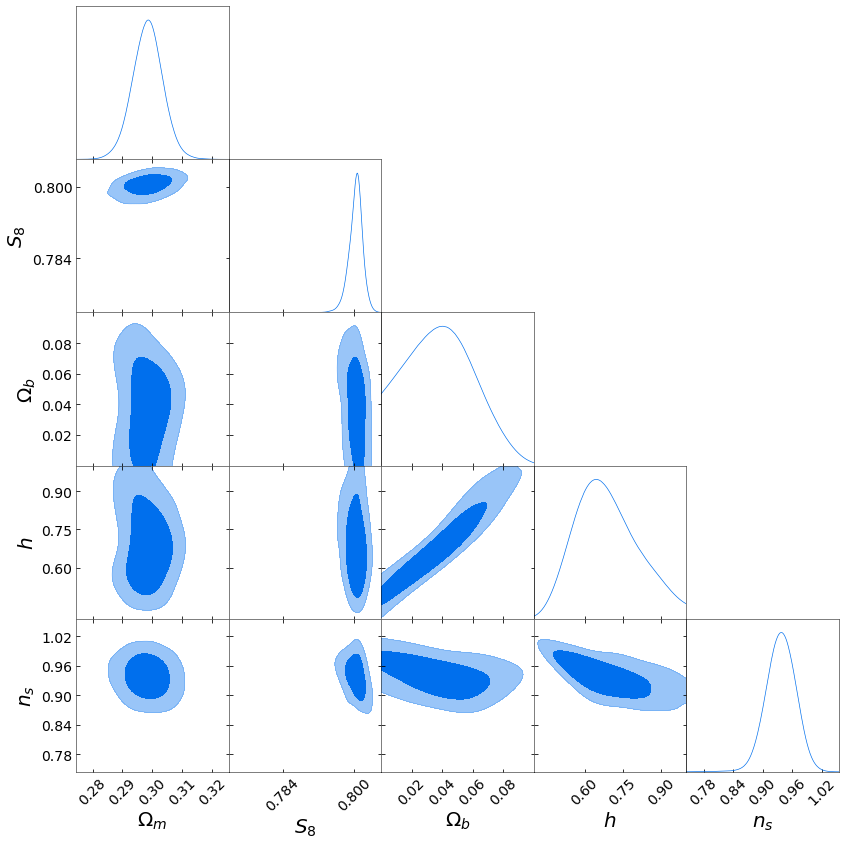

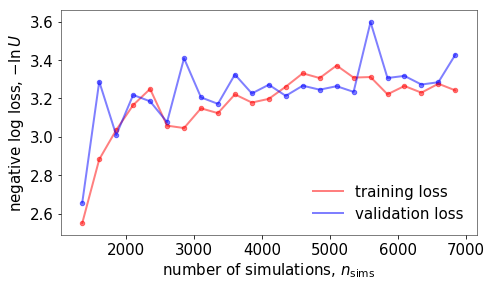

INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear_map/results/mdn_tmp_model


Sampling approximate posterior...
Done.
Removed no burn in


/home/tomcharnock/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


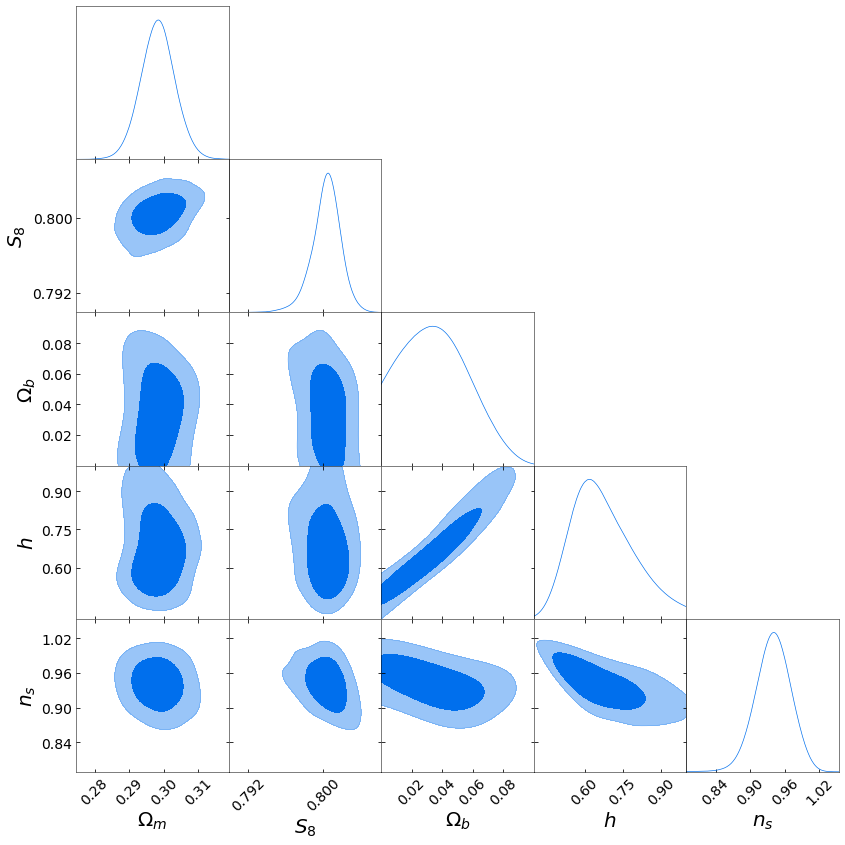

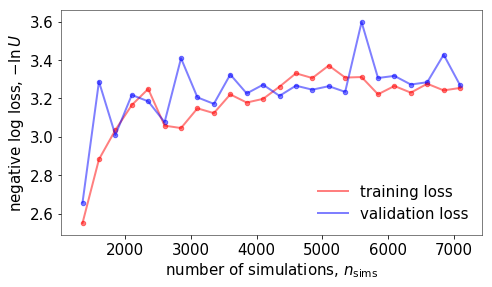

In [27]:
n_initial = 250
n_batch = 250
n_populations = 23
safety = 5
plot = True
batch_size = 100
validation_split = 0.1
epochs = 300
patience = 20
save_intermediate_posteriors = True

for population in tqdm.tnrange(n_populations + 1, desc = "Populations"):

    if population == 0:
        proposal = priors.TruncatedGaussian(DelfiMDN.data, 9*DelfiMDN.Finv, DelfiMDN.lower, DelfiMDN.upper)
        ps = proposal.draw(to_draw = safety * n_initial)
        n_sims_to_run = n_initial
    else:
        DelfiMDN.proposal_samples = DelfiMDN.emcee_sample(DelfiMDN.log_geometric_mean_proposal, [DelfiMDN.proposal_samples[-j,:] for j in range(DelfiMDN.nwalkers)], main_chain=DelfiMDN.proposal_chain_length)
        ps_batch = DelfiMDN.proposal_samples[-safety * n_batch:,:]
        n_sims_to_run = n_batch
        
    calculated = 0
    first = 0
    tries = 0
    last = n_sims_to_run
    while calculated < n_sims_to_run and last < safety * n_sims_to_run:
        batch = view.map_async(lambda theta: sub_batch_sims(theta), ps[first: last])
        batch_list = [batch.get()[i] for i in range(len(batch.get())) if batch.get()[i] is not None]
        calculated += len(batch_list)
        first = last
        last = last + (n_sims_to_run - calculated)
        if calculated > 0:
            DelfiMDN.ps = np.concatenate([DelfiMDN.ps, (np.array([batch_list[i][1] for i in range(len(batch_list))]) - DelfiMDN.theta_fiducial) / DelfiMDN.fisher_errors])
            DelfiMDN.xs = np.concatenate([DelfiMDN.xs, (np.array([compressor(batch_list[i][0], compressor_args) for i in range(len(batch_list))]) - DelfiMDN.theta_fiducial) / DelfiMDN.fisher_errors])
        tries += 1
    if last == safety * n_sims_to_run:
        print("failed too often. only using " + str(calculated) + " sims instead of " + str(n_sims_to_run))

    DelfiMDN.n_sims = DelfiMDN.ps.shape[0]
    val_loss, train_loss = DelfiMDN.trainer.train(DelfiMDN.sess, [DelfiMDN.ps.astype(np.float32), DelfiMDN.xs.astype(np.float32)], validation_split = validation_split, epochs = epochs, batch_size=max(DelfiMDN.n_sims//8, batch_size), progress_bar=DelfiMDN.progress_bar, patience=patience, saver_name='{}tmp_model'.format(DelfiMDN.results_dir), save_during_early_stopping = True)

    DelfiMDN.training_loss = np.concatenate([DelfiMDN.training_loss, train_loss])
    DelfiMDN.validation_loss = np.concatenate([DelfiMDN.validation_loss, val_loss])
    DelfiMDN.sequential_training_loss.append(train_loss[-1])
    DelfiMDN.sequential_validation_loss.append(val_loss[-1])
    DelfiMDN.sequential_nsims.append(DelfiMDN.n_sims)

    # Generate posterior samples
    print('Sampling approximate posterior...')
    DelfiMDN.posterior_samples = DelfiMDN.emcee_sample(DelfiMDN.log_posterior, [DelfiMDN.posterior_samples[-i,:] for i in range(DelfiMDN.nwalkers)], main_chain=DelfiMDN.posterior_chain_length)

    # Save posterior samples to file
    if save_intermediate_posteriors:
        f = open('{}posterior_samples_{:d}.dat'.format(DelfiMDN.results_dir, population), 'w')
    else:
        f = open('{}posterior_samples.dat'.format(DelfiMDN.results_dir), 'w')
    np.savetxt(f, DelfiMDN.posterior_samples)
    f.close()

    np.savez('{}parameters_summaries.npz'.format(DelfiMDN.results_dir), parameters = DelfiMDN.ps, summaries = DelfiMDN.xs)
    print('Done.')

    # If plot == True, plot the current posterior estimate
    if plot == True:
        DelfiMDN.triangle_plot([DelfiMDN.posterior_samples], savefig=True, filename='{}seq_train_post_{:d}.pdf'.format(DelfiMDN.results_dir, population))
        DelfiMDN.sequential_training_plot(savefig=True, filename='{}seq_train_loss.pdf'.format(DelfiMDN.results_dir))